# Graphviz
## 그래프 시각화 도구
#### '그래프' : 계산 그래프와 같이 노드와 화살표로 이루어진 데이터 구조
나의 경우 가상환경이 아닌 환경에서는 conda와 pycharm이 충돌하고 있어서 base 가상환경을 활용해 설치하였다.

Documents : https://graphviz.org/doc/info/lang.html

In [1]:
# TEST
from graphviz import Source

dot_diagraph = """
digraph graphname {
    rankdir=LR;
    a -> b -> c -> e -> f;
    b -> d;
}
"""
s = Source(dot_diagraph, filename='simple_diagraph', format='png')
s.view()

'simple_diagraph.png'

In [2]:
!dot -V # Graphviz 버전 확인

dot - graphviz version 2.38.0 (20140413.2041)


In [3]:
!dot sample.dot -T png -o sample.png
# sample.dot 라는 파일을 sample.png 파일로 변환하는 명령어. png 외에 pdf, svg 등도 지원함

Error: dot: can't open sample.dot


## 노드 생성

In [4]:
test = """
digraph g{
    x
    y
}
"""

# Source 객체 내부에 사용할 digraph 모양을 지정한 변수를 넣고, 파일명과 포맷방식을 설정한다.
s = Source(test, filename='simple_diagraph', format='png')
# 이후 s.view()를 통해서 이미지 뷰어를 통해 창을 띄운다.
s.view()

'simple_diagraph.png'

In [5]:
# ""가 아닌 ''값을 넣게 되면 syntax error가 발생하므로 쌍따옴표를 무조건 사용해야 함
diagraph_3_1 = """
digraph g {
1 [label="x"; color=orange; style=filled]
2 [label="y", color=orange, style=filled]
}
"""

s = Source(diagraph_3_1, filename='diagraph_3_1', format='png')
s.view()

'diagraph_3_1.png'

In [6]:
diagraph_3_2 = """
digraph g {
1 [label="x"; color=orange; style=filled]
2 [label="y", color=orange, style=filled]
3 [label="Exp", color=lightblue, style=filled; shape=box]
}
"""

s = Source(diagraph_3_2, filename='diagraph_3_2', format='png')
s.view()

'diagraph_3_2.png'

## 노드 연결

In [7]:
diagraph_3_3 = """
digraph g {
1 [label="x"; color=orange; style=filled]
2 [label="y", color=orange, style=filled]
3 [label="Exp", color=lightblue, style=filled; shape=box]
1 -> 3 [color=red]
3 -> 2 [color=black]
3 -> 2 [color=green]
}
"""

s = Source(diagraph_3_3, filename='diagraph_3_3', format='png')
s.view()

'diagraph_3_3.png'

## 계산 그래프에서 DOT 언어로 변환
#### 모듈 검색 경로와 관련된 에러 (Stackoverflow, Jupyter Notebook)
https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook/53052990

In [60]:
def _dot_var(v, verbose=False):
    """
    _dot_var : Local 형식으로 사용될 함수

    - 차후 get_dot_graph 함수 전용으로 사용 예정
    
    Parameter
    ---------
    v: Variable 객체를 의미
    dot_var : 노드(변수) id, label, color, style 의 총 4가지 양식에 따라서 노드를 그리기 위한 제작틀
    name : 인자 v의 name이 지정되어 있는 경우에는 그 이름을 그대로 활용하고 아닌 경우에는 None으로 대체
    verbose : Flag 역할을 하는 파라미터로 True일 경우 Varaible로 들어오는 x 파라미터에 대해 추가 정보를 제공

    Function
    --------
    id : 파이썬 기본 내장 함수(객체의 ID를 반환)
    """
    dot_var = '{} [label="{}", color=orange, style=filled]\n'

    name = '' if v.name is None else v.name
    if verbose and v.data is not None:
        if v.name is not None:
            name += ': '
        name += str(v.shape) + ' ' + str(v.dtype)
    return dot_var.format(id(v), name)

In [61]:
print(_dot_var.__doc__)


    _dot_var : Local 형식으로 사용될 함수

    - 차후 get_dot_graph 함수 전용으로 사용 예정
    
    Parameter
    ---------
    v: Variable 객체를 의미
    dot_var : 노드(변수) id, label, color, style 의 총 4가지 양식에 따라서 노드를 그리기 위한 제작틀
    name : 인자 v의 name이 지정되어 있는 경우에는 그 이름을 그대로 활용하고 아닌 경우에는 None으로 대체
    verbose : Flag 역할을 하는 파라미터로 True일 경우 Varaible로 들어오는 x 파라미터에 대해 추가 정보를 제공

    Function
    --------
    id : 파이썬 기본 내장 함수(객체의 ID를 반환)
    


In [62]:
# Jupyter Notebook에서는 .py 파일의 __file__ 변수를 지원하지 않기 때문에 sys 모듈을 import해서 경로를 추가해준 다음 사용해야 한다.
import sys
sys.path.append('..')
from myPackage import Variable

In [63]:
import numpy as np

In [64]:
x = Variable(np.random.randn(2, 3))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose = True))

2048130069072 [label="x", color=orange, style=filled]

2048130069072 [label="x: (2, 3) float64", color=orange, style=filled]



In [65]:
def _dot_func(f):
    """
    _dot_func: 함수와 입력 변수간의 관계 및 함수와 출력 변수간의 관계를 표현하는 함수
    
    Parameter
    ---------
    dot_func : 노드(함수) id, label, color, style 의 총 4가지 양식에 따라서 노드를 그리기 위한 제작틀
    txt : 최종적으로 DOT digraph에 들어가는 문자열
    dot_edge : txt에 들어가는 edge를 표현하는 제작틀
    """
    dot_func = '{} [label="{}", color=lightblue, style=filled, shape=box]\n'
    txt = dot_func.format(id(f), f.__class__.__name__)

    dot_edge = '{} -> {}\n'
    for x in f.inputs:
        txt += dot_edge.format(id(x), id(f))
    for y in f.outputs:
        txt += dot_edge.format(id(f), id(y()))
    return txt

In [66]:
x0 = Variable(np.array(1.))
x1 = Variable(np.array(1.))
y = x0 + x1
txt = _dot_func(y.creator)
print(txt)

2048130034176 [label="Add", color=lightblue, style=filled, shape=box]
2048130071760 -> 2048130034176
2048130069888 -> 2048130034176
2048130034176 -> 2048130031824



In [67]:
def get_dot_graph(output, verbose=True):
    """
    get_dot_graph : 역전파 수행(backward)에서 사용했던 방식을 가져와서 노드형태로 구현하는 함수

    Parameter
    ---------
    output : 최종 결과물(y)를 의미
    txt : 최종적으로 출력될 결과물로써 노드(Variable 객체, 함수 객체) 정보를 포함하고 있음
    funcs : 함수 객체가 들어갈 리스트로 차후 연결된 모든 관계를 표현하기 위해 사용될 예정
    seen_set : 함수 객체의 중복 append를 방지하기 위해 set을 사용
    """
    txt = ''
    funcs = []
    seen_set = set()

    def add_func(f):
        if f not in seen_set:
            funcs.append(f)
            # funcs.sort(key=lambda x: x.generation) # update (주석처리), 역전파는 순서가 중요했으나 DOT 언어에서는 edge가 표시되므로 상관없음
            seen_set.add(f)

    add_func(output.creator)
    txt += _dot_var(output, verbose) # update

    while funcs:
        func = funcs.pop()
        txt += _dot_func(func) # update
        for x in func.inputs:
            txt += _dot_var(x, verbose) # update

            if x.creator is not None:
                add_func(x.creator)

    return 'digraph g {\n' + txt + '}' # update

## DOT 언어를 활용한 이미지 변환
 DOT 언어를 활용한 이미지 변환
현재의 코드로는 DOT 언어를 이미지로 변환하려면 수동으로 진행해야 하기에 이것까지도 자동화시켜주는 함수를 설계

In [84]:
import os
import subprocess
from graphviz import render

In [180]:
def plot_dot_graph(output, verbose=True, to_file='graph.png'):
    """
    plot_dot_graph : dot + edge 그래프를 표현하는 함수

    Parameter
    ---------
    tmp_dir
        os.path.join을 활용하여 directory 경로를 가지고 있는 변수
        여기서 os.path.expanduser('~'), '.abc'는 ~/.abc라는 디렉터리를 의미
        ※ '~' : 사용자의 홈 디렉터리를 의미하는 '~'를 expanduser를 활용해 절대 경로로 풀어서 해석
    os.path.exists 구문 : tmp_dir 경로에 파일이 존재하지 않을 경우에 폴더를 추가하는 구문
    graph_path : tmp_graph.dot 파일의 경로를 설정하는 변수

    extension : 파일의 포맷 형식을 뽑기 위한 변수
    cmd : 최종 Graphviz를 그리되 dot 파일을 extension에 지정된 확장자로 표현하기 위한 command 명령어
    render : Graphviz 모듈의 render 객체로써 dot 파일을 png 파일로 변환한다.
    os.path.isfile : isfile 함수를 통해서 파라미터에 들어온 값이 파일인지 여부를 확인한다.
    os.rename : 첫 번째 인자로 들어온 값을 두 번째 인자의 값으로 이름을 변경한다.
    """
    dot_graph = get_dot_graph(output, verbose)

    # dot 데이터를 파일에 저장
    # tmp_dir = os.path.join(os.path.expanduser('~'), '.DL_level3')
    tmp_dir = os.path.join('..', 'Level3')
    if not os.path.exists(tmp_dir):
        os.mkdir(tmp_dir)
    graph_path = os.path.join(tmp_dir, to_file[:-4] + '.dot') 

    with open(graph_path, 'w') as f:
        f.write(dot_graph)

    # dot 명령 호출
    extension = os.path.splitext(to_file)[1][1:] # 확장자(png, pdf 등)

    # Python 전용
    # cmd = f'dot {graph_path} -T {extension} -o {to_file}'
    # subprocess.run(cmd, shell=True) 

    # Jupyter 전용
    render('dot', 'png', graph_path) 
    print(os.path.isfile(to_file[:-4] + '.dot.png'))
    os.rename(to_file[:-4] + '.dot.png', to_file[:-4] + '.png')

In [181]:
def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

In [184]:
x = Variable(np.array(1.))
y = Variable(np.array(1.))
z = goldstein(x, y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')

True


## 테일러 급수 미분

In [164]:
import numpy as np
from myPackage import Function

In [169]:
class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx

def sin(x):
    return Sin()(x)

In [170]:
from myPackage import Variable

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071067811865476
0.7071067811865476


## 테일러 급수 이론 

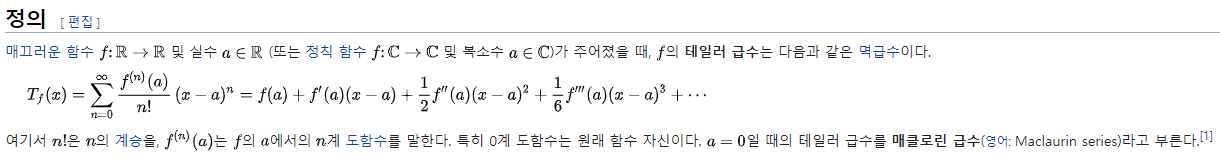

In [172]:
from IPython.display import Image

Image("taylor series.png")

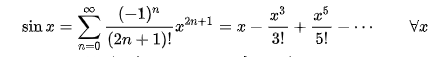

In [173]:
Image("sin function.png")

In [174]:
import math

# 현재 threshold를 지정하여 일정 오차 미만에 대해 반복문을 빠져나가도록 구성되어 있음
# threshold를 더 낮추면 정밀도가 높아지긴 하지만 프로그램 언어 특성 상 
# 반올림이나 자리수 누락 등의 이슈가 있기 때문에 더 세밀해지지 않을 수도 있음
def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

In [185]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='my_sin.png')

0.7071064695751781
0.7071032148228457
True


In [186]:
x = Variable(np.array(np.pi/4))
y = my_sin(x, 1e-150)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='my_sin2.png')

0.7071067811865475
0.7071067811865475
True


## 함수 최적화

어떤 함수가 주어졌을 때 그 최소값을 반환하는 '입력'을 찾는 일  
신경망 학습의 목표도 손실 함수의 출력을 최소화하는 매개변수를 찾는 것이므로 최적화 문제에 속함

## 로젠브록 함수
  그래프의 '산'에 등고선을 그리면 바나나를 닮았다고 해서 바나나 함수라고도 함  
  참고로 해당 함수의 최소값은 $ (x_0, x_1) = (1, 1) $ 임  
### $ y = 100(x_1 - x_0^{2})^{2} + (1 - x_0)^{2} $
### ※ 참고(올바른 바나나 함수): $ y = b(x_1 - x_0^{2})^{2} + (a - x_0)^{2} $

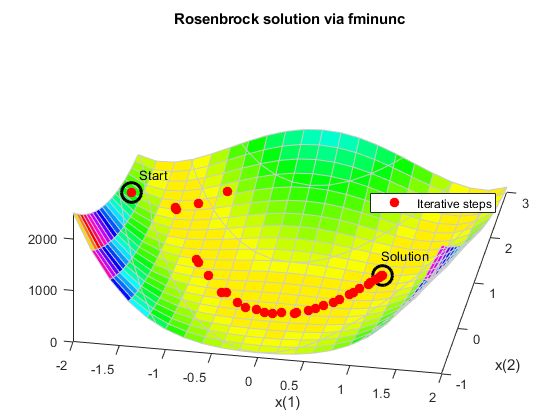

In [188]:
Image('banana_function.png')

In [189]:
import numpy as np
from myPackage import Variable

In [190]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

In [193]:
x0 = Variable(np.array(0.))
x1 = Variable(np.array(2.))

y = rosenbrock(x0, x1)
x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

y.backward()
plot_dot_graph(y, verbose=False, to_file='rosenbrock.png')

True


In [194]:
print(x0.grad, x1.grad)

-2.0 400.0


## 경사하강법
기울기가 최소 혹은 최대가 되는 지점을 따라가더라도 그것이 무조건 최대, 최소 조건을 만족시키지는 못할 수 있다.  
이처럼 극대, 극소값은 되나 최대, 최소값은 되지 못하는 지점에 대해 경사하강법이라는 기법을 사용해서 local한 영역을 벗어나 최대, 최소값을 구한다.  

In [254]:
x0 = Variable(np.array(0.))
x1 = Variable(np.array(2.))
lr = 0.001
iters = 1000

x0_list = []
x1_list = []

for i in range(iters):
    print(x0, x1)
    x0_list.append(0 + x0.data)
    x1_list.append(0 + x1.data)

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

variable(0.40175826909004075) from class's __repr__
variable(0.6355216210813501) from class's __repr__ variable(0.40211343619918827) from class's __repr__
variable(0.6357995367910667) from class's __repr__ variable(0.40246829513172405) from class's __repr__
variable(0.6360770907776637) from class's __repr__ variable(0.4028228463021262) from class's __repr__
variable(0.6363542838366483) from class's __repr__ variable(0.4031770901241362) from class's __repr__
variable(0.6366311167609536) from class's __repr__ variable(0.40353102701075966) from class's __repr__
variable(0.6369075903409506) from class's __repr__ variable(0.40388465737426754) from class's __repr__
variable(0.6371837053644576) from class's __repr__ variable(0.40423798162619723) from class's __repr__
variable(0.637459462616752) from class's __repr__ variable(0.4045910001773538) from class's __repr__
variable(0.6377348628805812) from class's __repr__ variable(0.40494371343781066) from class's __repr__
variable(0.63800990693617

In [255]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

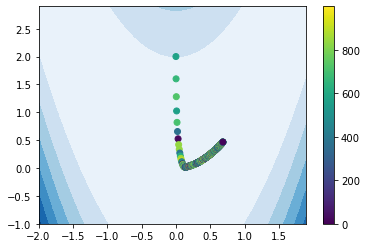

In [273]:
x = np.arange(-2.0, 2.0, 0.1)
y = np.arange(-1.0, 3.0, 0.1)
C = np.random.randint(0, 1000, 1000)

X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.contourf(X, Y, Z, cmap='Blues')
plt.scatter(x0_list, x1_list, c=C)
plt.colorbar()

## 뉴턴 방법 (최적화, 수동 계산)

In [274]:
import numpy as np
from myPackage import Variable

In [275]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

def gx2(x):
    return 12 * x ** 2 - 4

In [276]:
x = Variable(np.array(2.))
iters = 10

for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward()

    x.data -= x.grad / gx2(x.data)

0 variable(2.0) from class's __repr__
1 variable(1.4545454545454546) from class's __repr__
2 variable(1.1510467893775467) from class's __repr__
3 variable(1.0253259289766978) from class's __repr__
4 variable(1.0009084519430513) from class's __repr__
5 variable(1.0000012353089454) from class's __repr__
6 variable(1.000000000002289) from class's __repr__
7 variable(1.0) from class's __repr__
8 variable(1.0) from class's __repr__
9 variable(1.0) from class's __repr__


## 고차 미분